In [77]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [78]:
data = pd.read_csv('loan.csv')

In [79]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [80]:
data.shape

(614, 13)

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<AxesSubplot:title={'center':'Summary of Missing Values'}>

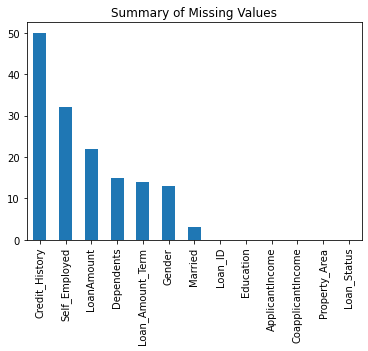

In [7]:
data.isnull().sum().sort_values(ascending=False).plot(kind='bar',title='Summary of Missing Values')

In [8]:
categorical_features = data.select_dtypes('object').columns

In [9]:
categorical_features

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
numerical_features = data.select_dtypes(exclude='object').columns

In [11]:
numerical_features

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

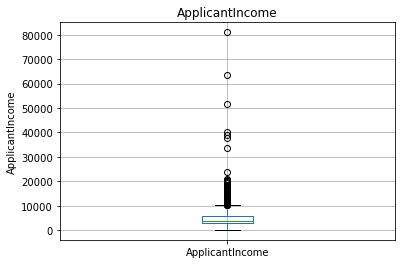

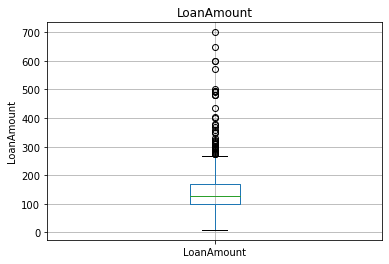

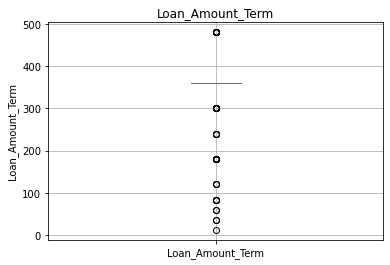

In [12]:
for feature in numerical_features:
    dataset=data.copy()
    if 0 in dataset[feature].unique():
        pass
    else:
        dataset[feature]=np.log(dataset[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

<AxesSubplot:title={'center':'Summary of Missing Values'}>

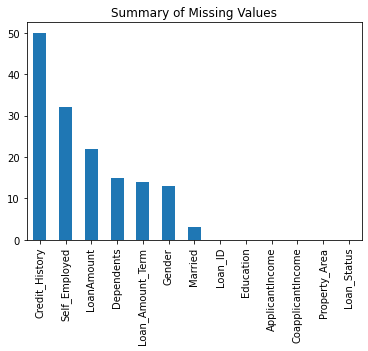

In [13]:
data.isnull().sum().sort_values(ascending=False).plot(kind='bar',title='Summary of Missing Values')

In [14]:
for i in categorical_features:
    data[i].fillna(method='ffill',inplace=True)

In [15]:
for i in numerical_features:
    data[i].fillna(data[i].mean(),inplace=True)

In [16]:
data['Gender']

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object

In [17]:
data['Gender'].replace({"Male":0,"Female":1},inplace=True)

In [18]:
data['Married'].replace({"No":0,"Yes":1},inplace=True)

In [19]:
data.drop(['Loan_ID'],axis=1,inplace=True)

In [20]:
data['Dependents'].replace({'3+':3},inplace=True)

In [21]:
data['Property_Area'].replace({'Urban':0,'Semiurban':1,'Rural':2},inplace=True)

In [22]:
from sklearn.preprocessing import LabelEncoder
#Graduate (0) Not Graduate(1)
le = LabelEncoder()
data['Education']= le.fit_transform(data['Education'])

In [23]:
data['Self_Employed'].replace({'No':0,'Yes':1},inplace=True)

In [24]:
data['Dependents']=data['Dependents'].astype(int)

In [25]:
data['Loan_Status'].replace({"Y":1,"N":0},inplace=True)

In [26]:
data.dtypes

Gender                 int64
Married                int64
Dependents             int32
Education              int32
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [27]:
data['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [28]:
#Data is imbalancing

In [29]:
#from sklearn.ensemble import RandomForestClassifier

In [30]:
from imblearn.over_sampling import RandomOverSampler

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x = data.drop(['Loan_Status'],axis=1)
y=data['Loan_Status']

In [33]:
rus = RandomOverSampler(random_state=42)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(x, y)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(x_rus,y_rus,test_size=0.25,random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((633, 11), (633,), (211, 11), (211,))

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
data.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,-0.371532,-0.164475,-0.049480,-0.011676,-0.046230,-0.086991,-0.098654,0.075409,-0.008948,-0.019854,-0.012213
Married,-0.371532,1.000000,0.333841,0.014097,-0.000257,0.049052,0.077760,0.146981,-0.095332,0.004301,-0.004415,0.089072
Dependents,-0.164475,0.333841,1.000000,0.054909,0.044505,0.115036,0.026683,0.158787,-0.084740,-0.062298,-0.005131,-0.003361
Education,-0.049480,0.014097,0.054909,1.000000,-0.008734,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,0.065243,-0.085884
Self_Employed,-0.011676,-0.000257,0.044505,-0.008734,1.000000,0.122728,-0.021807,0.111763,-0.028017,0.004144,0.037106,0.009035
ApplicantIncome,-0.046230,0.049052,0.115036,-0.140760,0.122728,1.000000,-0.116605,0.565620,-0.045242,-0.014477,0.009500,-0.004710
CoapplicantIncome,-0.086991,0.077760,0.026683,-0.062290,-0.021807,-0.116605,1.000000,0.187828,-0.059675,-0.001665,-0.010522,-0.059187
LoanAmount,-0.098654,0.146981,0.158787,-0.166998,0.111763,0.565620,0.187828,1.000000,0.038801,-0.007738,0.044776,-0.036416
Loan_Amount_Term,0.075409,-0.095332,-0.084740,-0.077242,-0.028017,-0.045242,-0.059675,0.038801,1.000000,0.001395,0.077620,-0.020974
Credit_History,-0.008948,0.004301,-0.062298,-0.077936,0.004144,-0.014477,-0.001665,-0.007738,0.001395,1.000000,0.001880,0.540483


In [37]:
sc = StandardScaler()

<AxesSubplot:>

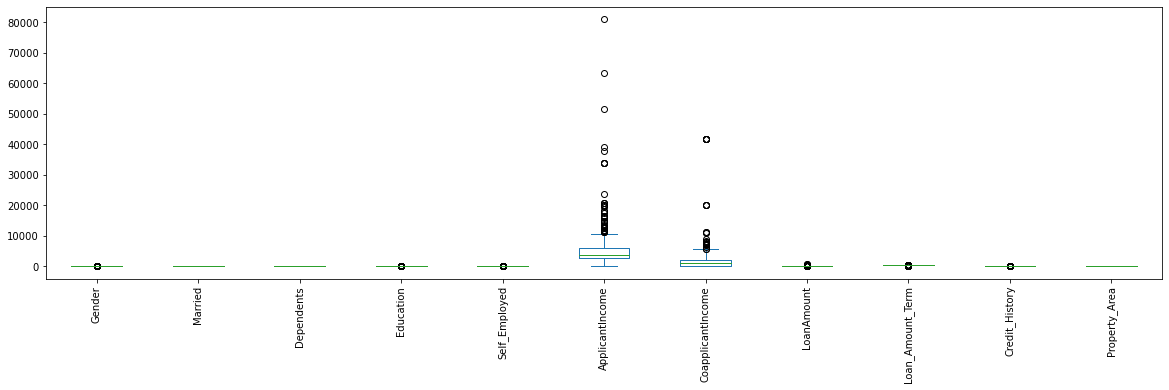

In [38]:
X_train.plot.box(figsize=(20,5), rot=90)

<AxesSubplot:>

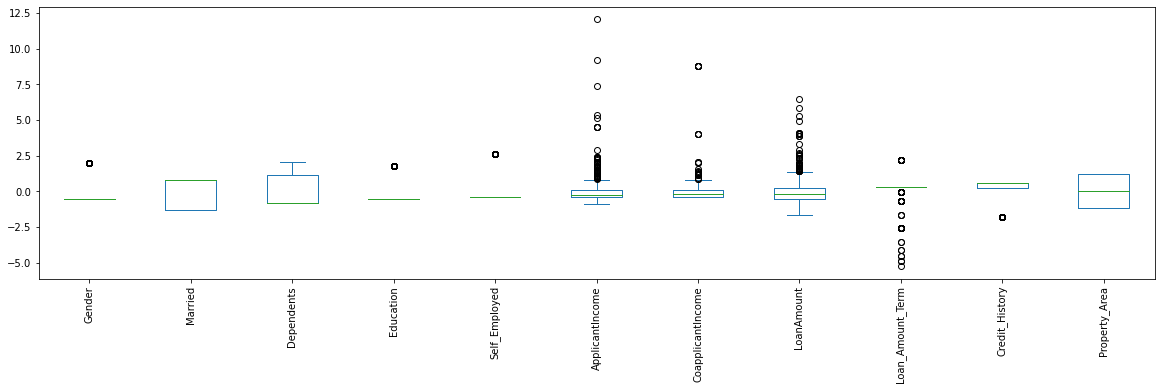

In [39]:
from sklearn.preprocessing import StandardScaler
scale = sc.fit(X_train)
X_train_stand = scale.transform(X_train)
X_test_stand = scale.transform(X_test)
pd.DataFrame(X_train_stand, columns=X_train.columns).plot.box(figsize=(20,5), rot=90)

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
LR = LogisticRegression()

In [42]:
LR.fit(X_train_stand,y_train)

LogisticRegression()

In [43]:
y_pred=LR.predict(X_test_stand)

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
print(accuracy_score(y_test,y_pred))

0.7061611374407583


In [46]:
from sklearn import metrics
import seaborn as sns

<AxesSubplot:>

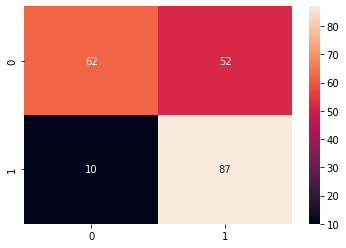

In [47]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True)

In [48]:
res = pd.DataFrame()

In [49]:
res['Actual']=y_test
res['Predict']=y_pred

In [50]:
res.to_clipboard()

In [51]:
# load library
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(X_train_stand,y_train)

# predict
rfc_predict = rfc.predict(X_test_stand)# check performance
#print('ROCAUC score:',roc_auc_score(y_test, rfc_predict))
print('Accuracy score:',accuracy_score(y_test, rfc_predict))
print('F1 score:',metrics.f1_score(y_test, rfc_predict))

Accuracy score: 0.8578199052132701
F1 score: 0.8469387755102041


<AxesSubplot:>

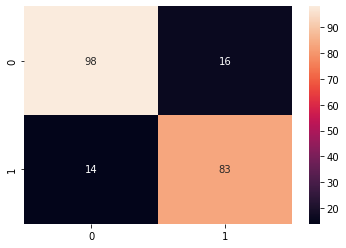

In [52]:
sns.heatmap(metrics.confusion_matrix(y_test,rfc_predict),annot=True)

In [53]:
import pickle

In [58]:
dat=[[1.0,0,0,0,0,5849,0.0,146.4122162,360.0,1.0,0]]
#dat=[[1.0,0.0,0.0,1.0,1.0,17263.0,0.0,225.0,360,1.0,1.0,]]
#dat=[[1,0,0,1,1,17263,0,225,360,1,1]]

In [59]:
import pickle
pickle_name='model.pkl'
with open(pickle_name,'wb') as file:
    pickle.dump(rfc,file)

In [60]:
with open("model.pkl","rb") as fp:
    mode = pickle.load(fp)

In [61]:
mode.predict(sc.transform(dat))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [127]:
x.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [130]:
data['Credit_History'].value_counts()

1.000000    475
0.000000     89
0.842199     50
Name: Credit_History, dtype: int64

In [58]:
res

,Actual,Predict
493,1,1
215,1,1
622,0,1
737,0,0
63,0,0
...,...,...
210,0,1
361,1,1
500,1,0
558,1,1


In [59]:
data.iloc[493]
dat=[[1.0,0.0,0.0,1.0,1.0,17263.0,0.0,225.0,360,1.0,1.0,1,0]]

Gender                   1.0
Married                  0.0
Dependents               0.0
Education                1.0
Self_Employed            1.0
ApplicantIncome      17263.0
CoapplicantIncome        0.0
LoanAmount             225.0
Loan_Amount_Term       360.0
Credit_History           1.0
Property_Area            1.0
Loan_Status              1.0
Name: 493, dtype: float64

In [62]:
data.iloc[493]

Loan_ID                  LP002582
Gender                     Female
Married                        No
Dependents                      0
Education            Not Graduate
Self_Employed                 Yes
ApplicantIncome             17263
CoapplicantIncome             0.0
LoanAmount                  225.0
Loan_Amount_Term            360.0
Credit_History                1.0
Property_Area           Semiurban
Loan_Status                     Y
Name: 493, dtype: object

In [62]:
import pickle
pickle_file = open('Model1.pkl','wb')
pickle.dump(LR,pickle_file)

In [65]:
x.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [72]:
data=([0, 1, 0, 1, 0, 5000, 0, 1000, 12, 0, 0])

In [67]:
mode.predict([data])

array([0], dtype=int64)

In [69]:
type(data)

list

In [74]:
mode.predict([data])

array([0], dtype=int64)

In [125]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code


In [126]:
detect_outliers_iqr(data['LoanAmount'])

[]

In [112]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [113]:

sample=data['Loan_Amount_Term']
sample

0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
       ...  
609    360.0
610    180.0
611    360.0
612    360.0
613    360.0
Name: Loan_Amount_Term, Length: 614, dtype: float64

In [114]:
sample_outliers = detect_outliers_iqr(sample)
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  []


In [90]:
li=sample.to_list()